# 5-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

---

## **목차**

Step1.[사진 모으기](#Step1.-사진-모으기)  
Step2.[얼굴 영역 자르기](#Step2.-얼굴-영역-자르기)  
Step3.[얼굴 영역의 임베딩 추출하기](#Step3.-얼굴-영역의-임베딩-추출하기)  
Step4.[모은 연예인들과 비교하기](#Step4.-모은-연예인들과-비교하기)  
Step5.[다양한 재미있는 시각화 시도해 보기](#Step5.-다양한-재미있는-시각화-시도해-보기)  
번외. [추가로 궁금한 사항](#번외.-추가로-궁금한-사항)  
⭐[루브릭 관련 고려한 점](#루브릭-관련-고려한-점)  
🙋[회고](#회고)


---

## Step1. 사진 모으기

**1. 내 사진 찍기**  
    내 사진을 2장 이상 포함할 것.  
    

**2. 비교할 연예인 사진 모으기**  
    많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아짐.

## Step2. 얼굴 영역 자르기

In [1]:
# 필요한 모듈 불러오기

import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
%matplotlib inline    
from PIL import Image
import numpy as np

In [2]:
# 이미지 파일 불러오기

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print('연예인 이미지 파일 갯수:', len(file_list) - 5) # 추가한 내 사진 수를 뺀 나머지 사진 수 세기

연예인 이미지 파일 갯수: 268


In [3]:
# 이미지 파일 리스트 확인

print ("파일 리스트:\n{}".format(file_list))

파일 리스트:
['드웨인 존슨.jpg', '류승범.jpg', '찬열.jpeg', '지코.jpg', '성룡.jpg', '문재인.jpeg', '배성우.png', '트와이스미나.jpg', '벤 에플렉.jpeg', '장성호.jpeg', '서현진.jpg', '슈퍼비.jpeg', '노무현.jpeg', '윤균상.jpg', '최현석.jpg', '신비.jpg', '이정재.jpeg', '장동건.jpeg', '이제훈.jpeg', '효정.jpg', '박나래.jpeg', '줄리엔강.png', '이동국.jpeg', '나인뮤지스경리.jpg', '박찬욱.jpeg', '이명박.jpg', '조정치.jpg', '잇섭.png', '.ipynb_checkpoints', '제이크 질렌할.jpeg', '씨잼.jpg', '한효주.jpg', '리암 니슨.png', '류승룡.jpeg', '티모시 달튼.jpeg', '류현진.jpg', '무라니시.png', '시우민.jpg', '한기범.jpg', '정우성.jpeg', '존 파브르.jpeg', '카이.jpg', '톰 홀랜드.jpg', '신동엽.jpg', '김학범.jpg', '브래들리 쿠퍼.jpg', '마크 러팔로.jpeg', '티파니.jpg', '제이홉.jpg', 'mypicture.jpeg', '트와이스사나.jpg', '슈가.jpg', '이승기.jpeg', '철면수심.jpg', '이재용.jpg', '정준하.jpg', '정국.jpg', '조인성.jpg', '하정우.jpg', '아이즈원민주.jpg', '야마다 타카유키.jpeg', '김윤석.jpeg', '이경규.jpeg', '제이콥 배털론.jpg', '유지태.jpg', '아이유.jpg', '이효리.jpg', '이민호.jpeg', '박성호.jpg', '박서준.jpeg', '송중기.jpeg', '김연우.jpeg', '장원영.jpeg', '서강준.jpg', '클린트 이스트우드.jpg', '이승환.jpg', '하현우.jpg', 'RM.jpg', '숀 코네리.jpg', '사무엘 L 잭슨.jpg', '아린.jpg', '온앤오

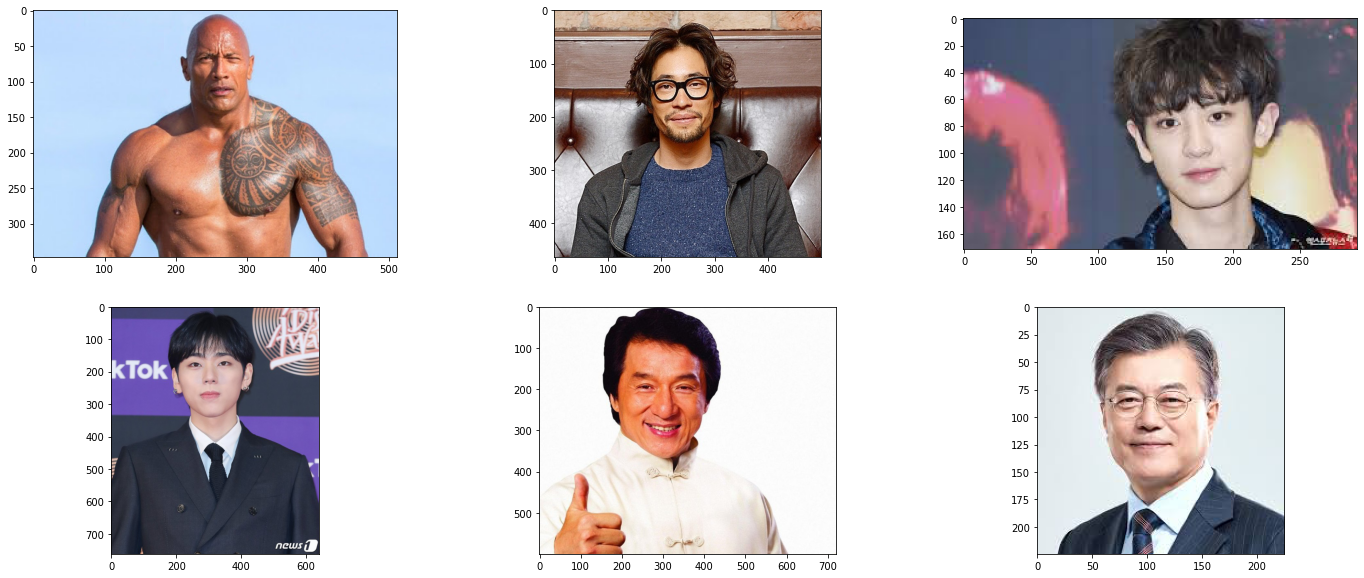

In [4]:
# 이미지 파일 일부 확인

# Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [5]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라주는 함수

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

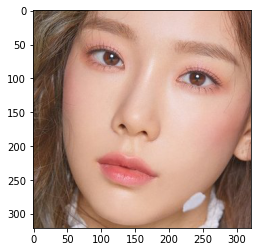

In [6]:
# 얼굴 영역이 정확히 잘리는 지 확인

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/태연.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

In [7]:
# 얼굴 임베딩 벡터 확인

image_file = os.path.join(dir_path, '윤아.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.04312247,  0.08564552,  0.03009056, -0.08181583, -0.11011461,
         0.02494148, -0.10772792, -0.05701545,  0.17388532, -0.18900771,
         0.16986866, -0.03416952, -0.17708749, -0.05368887, -0.01866906,
         0.21673702, -0.20324194, -0.17635439, -0.02879484, -0.01345684,
         0.06087445,  0.06625142, -0.01931382,  0.05088738, -0.14900336,
        -0.36360452, -0.07931203, -0.00558482, -0.00789603, -0.08097173,
        -0.07099783,  0.06724349, -0.19027036,  0.01524133,  0.0240485 ,
         0.09224878,  0.01277889, -0.13150908,  0.16621512,  0.04842792,
        -0.27101019,  0.04768866,  0.03001825,  0.22964384,  0.1573851 ,
        -0.02196661,  0.0071197 , -0.13134143,  0.13647683, -0.15807396,
         0.03541355,  0.16926353, -0.00215843,  0.05462443,  0.00675566,
        -0.12905742,  0.01647738,  0.14232153, -0.10321216, -0.04842221,
         0.03842257, -0.02524096,  0.01162205, -0.11770099,  0.17995374,
         0.0968788 , -0.06566481, -0.26271284,  0.1

In [8]:
# 파일 경로를 넣으면 embedding_dict를 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)

In [10]:
# get_face_embedding_dict을 적용하면 어떻게 나오는지 확인해보기

embedding_dict['김고은']

array([-1.05234988e-01,  7.49845654e-02,  6.12118393e-02, -1.31831020e-01,
       -9.91628617e-02, -5.81961684e-02, -6.92665577e-02, -7.56746233e-02,
        1.40702367e-01, -1.96840674e-01,  1.69942498e-01, -1.01041399e-01,
       -2.61407495e-01, -1.11824675e-02, -5.66985831e-02,  2.24923685e-01,
       -9.88738090e-02, -1.64930642e-01, -3.80432680e-02,  4.64962982e-02,
        1.13270521e-01,  3.00744586e-02, -5.28326966e-02,  8.12223107e-02,
       -8.50443393e-02, -3.09713900e-01, -1.35344282e-01,  3.97070535e-02,
       -1.03595585e-01, -7.74850026e-02, -1.96280032e-02,  4.47001904e-02,
       -1.79561138e-01,  6.74174633e-03, -1.11324340e-03,  1.38507918e-01,
        1.96020794e-03, -9.99446064e-02,  1.51724622e-01,  4.65792567e-02,
       -2.99472064e-01,  7.63994008e-02,  9.46606323e-02,  2.61721104e-01,
        1.80130482e-01, -3.17837182e-03,  1.30437687e-03, -1.69200405e-01,
        1.30248040e-01, -1.95851371e-01,  3.96300778e-02,  1.31669462e-01,
        8.17188770e-02,  

## Step4. 모은 연예인들과 비교하기

In [11]:
# 이미지 간 거리를 구하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [12]:
# 본인 사진의 거리를 확인해보자

print('내 사진끼리의 거리는?:', get_distance('mypicture', 'mypicture1'))

내 사진끼리의 거리는?: 0.38328451530196284


In [13]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('mypicture')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('mypicture') 라고 호출할 때 이미지 사이의 임베딩 벡터 거리를 계산합니다.

In [14]:
# 오름차순 정렬 및 mypicture와의 임베딩 벡터 거리 함수로 정렬

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('mypicture',
  array([-0.09335723,  0.03878667,  0.07519668, -0.04742517, -0.09465712,
         -0.00254339, -0.08903974, -0.05983419,  0.10795525, -0.1905912 ,
          0.21406652, -0.09526268, -0.20450447, -0.00660714, -0.07165994,
          0.21532813, -0.13120557, -0.14732867, -0.04054214,  0.02368703,
          0.08841198,  0.02775369, -0.05477163,  0.03976791, -0.13944994,
         -0.33170846, -0.10177122, -0.02079259, -0.09399513, -0.03721281,
         -0.05077944,  0.06316046, -0.13523717,  0.02208083,  0.00867846,
          0.14354293, -0.01406113, -0.11459036,  0.11653365,  0.00130564,
         -0.32966048,  0.02506573,  0.11894198,  0.21968317,  0.20022064,
         -0.01019701,  0.00576298, -0.11586794,  0.07950456, -0.23479266,
          0.00547102,  0.13693406,  0.03276867,  0.07026702,  0.01672793,
         -0.08935072,  0.05034852,  0.11906295, -0.10648758, -0.03068328,
          0.10171504, -0.09928761,  0.01965082, -0.08630892,  0.17228734,
          0.11871855, -

In [15]:
# 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 출력하는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank_cnt = 1 # 순위를 세는 변수
    pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
    end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
    for i in range(top+15):
        rank_cnt += 1
        if sorted_faces[i][0].find('mypicture') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
            pass_cnt += 1
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            end += 1
        if end == 5: # end가 5가 된 경우 연예인 5명 출력되었기에 종료합니다.
            break

In [16]:
# mypicture와 가장 닮은 사람은 누굴까요?

get_nearest_face('mypicture')

순위 1 : 이름(사쿠라), 거리(0.36107689719729225)
순위 2 : 이름(트와이스나연), 거리(0.36906292012955577)
순위 3 : 이름(아이유), 거리(0.3703590842312735)
순위 4 : 이름(유트루), 거리(0.3809516850126146)
순위 5 : 이름(지호), 거리(0.3886670633997685)


In [17]:
# mypicture1와 가장 닮은 사람은 누굴까요?

get_nearest_face('mypicture1')

순위 1 : 이름(사쿠라), 거리(0.3237434736600682)
순위 2 : 이름(우기), 거리(0.3537351955233634)
순위 3 : 이름(유트루), 거리(0.39104041577227755)
순위 4 : 이름(아린), 거리(0.3949548773897178)
순위 5 : 이름(제니), 거리(0.40308138208460237)


## Step5. 다양한 재미있는 시각화 시도해 보기

In [19]:
# 사진 경로 설정

mypicture1 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/mypicture.jpeg'
mypicture2 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/mypicture1.jpeg'
mypicture3 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/mypicture14.jpeg'
mypicture4 = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/mypicture15.jpeg'

sakura = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/사쿠라.jpg'
nayeon = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/트와이스나연.jpg'
iu = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/아이유.jpg'
yootrue = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/유트루.png'
jiho = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/지호.jpg'

ugi = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/우기.jpg'
arin = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/아린.jpg'
jennie = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/제니.jpg'

In [20]:
# 크롭한 얼굴을 저장해 보자

a1 = get_cropped_face(mypicture1)
a2 = get_cropped_face(mypicture2)
a3 = get_cropped_face(mypicture3)
a4 = get_cropped_face(mypicture4)

b1 = get_cropped_face(sakura)
b2 = get_cropped_face(nayeon)
b3 = get_cropped_face(iu)
b4 = get_cropped_face(yootrue)
b5 = get_cropped_face(jiho)

b6 = get_cropped_face(ugi)
b7 = get_cropped_face(arin)
b8 = get_cropped_face(jennie)

mypicture의 순위
순위 1 : 이름(사쿠라), 거리(0.36107689719729225)
순위 2 : 이름(트와이스나연), 거리(0.36906292012955577)  
순위 3 : 이름(아이유), 거리(0.3703590842312735)  
순위 4 : 이름(유트루), 거리(0.3809516850126146)  
순위 5 : 이름(지호), 거리(0.3886670633997685)


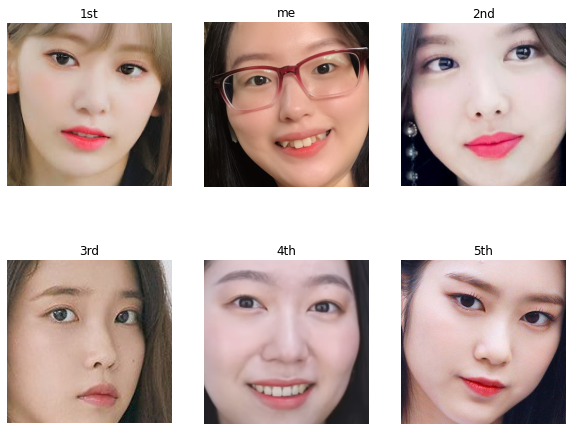

In [21]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(b1)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a1)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b2)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b3)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b4)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b5)
plt.axis('off')
plt.title('5th')

print('''mypicture의 순위
순위 1 : 이름(사쿠라), 거리(0.36107689719729225)
순위 2 : 이름(트와이스나연), 거리(0.36906292012955577)  
순위 3 : 이름(아이유), 거리(0.3703590842312735)  
순위 4 : 이름(유트루), 거리(0.3809516850126146)  
순위 5 : 이름(지호), 거리(0.3886670633997685)''')

mypicture1의 순위
순위 1 : 이름(사쿠라), 거리(0.3237434736600682)
순위 2 : 이름(우기), 거리(0.3537351955233634)
순위 3 : 이름(유트루), 거리(0.39104041577227755)
순위 4 : 이름(아린), 거리(0.3949548773897178)
순위 5 : 이름(제니), 거리(0.40308138208460237)


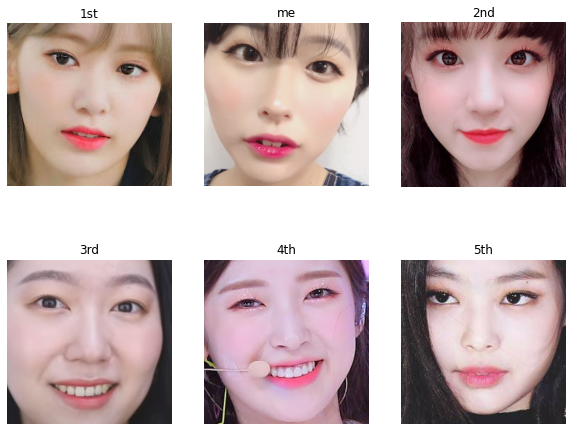

In [22]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(b1)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a2)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b6)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)
plt.imshow(b4)
plt.axis('off')
plt.title('3rd')
plt.subplot(235)
plt.imshow(b7)
plt.axis('off')
plt.title('4th')
plt.subplot(236)
plt.imshow(b8)
plt.axis('off')
plt.title('5th')

print('''mypicture1의 순위
순위 1 : 이름(사쿠라), 거리(0.3237434736600682)
순위 2 : 이름(우기), 거리(0.3537351955233634)
순위 3 : 이름(유트루), 거리(0.39104041577227755)
순위 4 : 이름(아린), 거리(0.3949548773897178)
순위 5 : 이름(제니), 거리(0.40308138208460237)''')

---

## 번외. 추가로 궁금한 사항

### 1.1 같은 사진을 좌우 반전한 경우 순위가 달라질까?

In [23]:
# mypicture의 반전된 사진을 가져오기

mypicture_flip = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/mypicture_flip.jpeg'

c1 = get_cropped_face(mypicture_flip)

(-0.5, 798.5, 798.5, -0.5)

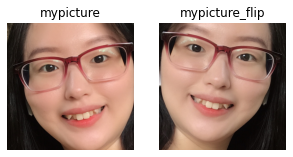

In [24]:
# 좌우 반전 이미지 확인해보기

plt.figure(figsize=(5,5))

plt.subplot(121)
plt.imshow(a1)
plt.title('mypicture')
plt.axis('off')
plt.subplot(122) 
plt.imshow(c1)
plt.title('mypicture_flip')
plt.axis('off')

In [25]:
print('내 사진끼리의 거리는?:', get_distance('mypicture', 'mypicture_flip'))

내 사진끼리의 거리는?: 0.1782133455219404


In [26]:
# mypicture_flip와 가장 닮은 사람은 누굴까요?

get_nearest_face('mypicture_flip')

순위 1 : 이름(사쿠라), 거리(0.3865246693744173)
순위 2 : 이름(아이유), 거리(0.3877713570807082)
순위 3 : 이름(유트루), 거리(0.39281216041802536)
순위 4 : 이름(아이린), 거리(0.40809172520255077)
순위 5 : 이름(태연), 거리(0.40939395076428103)


### 1.2 결론

- 사진만 보더라도 크롭된 위치가 달라져 임베딩 수치에 영향을 준다는 것을 알 수 있다.
- 다만 임베딩 거리를 확인해봤을 경우 0.1 수준으로 본인 사진들 중에서도 아주 가까운 거리를 나타냄을 알 수 있다.
- 반전하기 전인 mypicture의 닮은 연예인들을 비교해봤을 때, 사쿠라,아이유,유트루는 동일하고 아이린과 태연이 추가되었다.
- 좌우 반전 사진은 원본 사진과 가까운 값을 가지나, 얼굴 임베딩 벡터가 달라지기에 결과가 다르게 나온다.

---

### 2.1 눈으로 판단한 유사도와 얼마나 비슷할까?

닮은 연예인으로 사쿠라가 나오면서 정확성에 대한 의심이 생겼다.  
그래서 본인 사진중에서도 서로 닮은 사진과 닮진 않은 사진을 각 2장씩 준비해보았다.  
임의 판단이긴 하나 안경유무와 화장으로 닮은 사진을 구분해보고자 한다.  


안경을 쓰고 미소짓는 mypicture와 mypicture14, 그리고 안경 미착용한 웃지않는 mypicture1과 mypicture15를 거리 비교해 볼 것이다.

Text(0.5, 1.0, 'mypicture15')

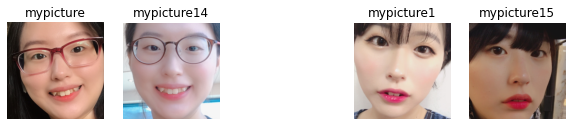

In [27]:
plt.figure(figsize=(10,8))

plt.subplot(151)
plt.imshow(a1)
plt.axis('off')
plt.title('mypicture')
plt.subplot(152)
plt.imshow(a3)
plt.axis('off')
plt.title('mypicture14')
plt.subplot(154)
plt.imshow(a2)
plt.axis('off')
plt.title('mypicture1')
plt.subplot(155)
plt.imshow(a4)
plt.axis('off')
plt.title('mypicture15')

✔️ 비교는 mypicture와 mypicture1을 기준으로 거리를 비교해봤다.

In [28]:
print('mypicture 기준으로 거리를 확인해보자\n')
print('mypicture14와의 거리는?:', get_distance('mypicture', 'mypicture14'))
print('mypicture1와의 거리는?:', get_distance('mypicture', 'mypicture1'))
print('mypicture15와의 거리는?:', get_distance('mypicture', 'mypicture15'))

mypicture 기준으로 거리를 확인해보자

mypicture14와의 거리는?: 0.27598646403984983
mypicture1와의 거리는?: 0.38328451530196284
mypicture15와의 거리는?: 0.44863871257469873


In [29]:
print('mypicture1 기준으로 거리를 확인해보자\n')

print('mypicture와의 거리는?:', get_distance('mypicture1', 'mypicture'))
print('mypicture14와의 거리는?:', get_distance('mypicture1', 'mypicture14'))
print('mypicture15와의 거리는?:', get_distance('mypicture1', 'mypicture15'))

mypicture1 기준으로 거리를 확인해보자

mypicture와의 거리는?: 0.38328451530196284
mypicture14와의 거리는?: 0.3422763667680173
mypicture15와의 거리는?: 0.35971065558747956


### 2.2 결론

- 처음 mypicture와 가장 가까운 거리의 사진이 mypicture14가 나와서 비슷한 결과가 나올 줄 알았다.
- 다만 mypicture1의 경우 비슷하긴 하나 mypicture14가 가장 가까운 값으로 나와서, 눈으로 보기에 닮은 사진이 임베딩 값이 훨씬 유사하다고 단정짓기는 어려울 것 같다.
- 앞선 mypicture_flip의 경우처럼 동일 인물은 유사한 임베딩 값을 가질 있으나, 이는 사람이 판단하는 유사도와 다를 수 있다.
- 그렇기에 닮은 연예인에 대한 부분에 납득이 되지 않을 수 있다.
- 이 차이를 좁히기 위해서는 좀더 많은 양의 데이터 수집이 필요하지 않을까 싶다.

---

## 루브릭 관련 고려한 점

**1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.**

- 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

**2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.**

- 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
- 내 사진을 선정할 때 비슷한 표정이 아닌 다른 표정과 각도의 사진을 활용해 얼굴 거리를 측정했다.


**3. 다양하고 재미있는 결과 시각화를 시도하였다.**

- matplotlib를 이용하여 나와 닮은 꼴 연예인들의 사진을 한눈에 볼 수 있게 시각화하였다.

## 회고

- 기본적으로 노드에서 설명해주는 코드를 토대로 작성해봤을 때 닮은 연예인 5명을 추출하는 것은 어렵지 않았다.
- 실제로 닮았다고 들은 유튜버 유트루님도 추가해서 넣어봤는데 순위권에 올라간 게 신기했다.
- 근데 일위로 나왔지만 닮았는지 생각해보면 아닌 것 같아 개선이 필요할 것 같다.
- 사진이라서 그런건가 싶어 영상으로도 이를 구분한다면 다른 결과가 나오지 않을까 싶다.
- 영상으로 닮은 연예인 구분하는 건 이미 틱톡이나 다른 어플들에서도 있는데 실력을 쌓아서 비슷한 것들도 스스로 만들 수 있게 되고 싶다.
- step1.에 적은 것처럼 더 많은 데이터 확보가 필요할 것 같다.

1. 잘한 점:
    - get_nearest_face() 함수에서 본인 사진인 경우 if i == 0: continue 코드로 넘어 갔는데, 이 경우 본인 사진이 1장인 경우에만 해당되고, 여러장 들어갔을 땐 연예인 사진 외 본인 사진도 순위에 들어가는 걸 알 수 있었다.
    - 원하는 결과값은 닯은 연예인 5명이 나오는 거라 파일명 탐색을 위해 find()를 넣었고 이를 카운트 해주는 변수를 추가하여 변경하였다.
    - 그리고 들어가는 본인 사진의 갯수가 달라질 수 있기에 닮은 꼴 5명이 되었을 경우 종료할 수 있도록 break를 추가했다.
    - 다만 이를 위해서는 본인 사진의 파일명을 통일해주고 find('통일된 본인 파일명')을 넣어줘야 한다.  
    - 이전에는 코드작성과 정확한 결과물에 대해서만 집중했다면 시각화에 대해서 고민해보았고, 사진 크기 조정을 위해 figsize를 조정할 수 있게 되었다.
  
  
2. 어려웠던 점:
    - 연예인 사진을 일일히 모으는데도 시간이 소요되기에 AIFFEL 전통적인 연예인 사진 데이터를 사용했다.(감사합니다😍)
    - 주의사항에 해당 데이터는 기존 노드 코드로는 작동되지 않고 예외처리를 해야한다고 적혀있었으나, 지속되는 Key Error에 갈피를 잡지 못했다.
    - 아이펠 인천의 헤르미온느 [우용님의 깃허브](https://github.com/dldndyd01/AI_STUDY/blob/master/FaceEmbedding/FaceEmbedding.ipynb)를 확인해봤을 때 get_face_embedding_dict() 부분이 다른 것을 알 수 있었다.
    - 얼굴영역이 임베딩되지 않는 경우가 생겨 계속 에러가 발생된 것이였다.
    - 해당 함수 주석으로 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생한다고 적혀있었는 데 보고서도 생각을 못한 것이였다.
    - 위 주석과 우용님의 코드를 보고 얼굴영역이 임베딩 되지 않을 경우, try와 except를 통해 예외처리한 것을 알 수 있었다.  
    - 시각화에 대해 닮은 연예인들을 보여주기만 하면 되는건지...? 시각화라는게 어디까지인 건지 잘 모르겠다. 그래서 잘했는지 체크하는 것도 어렵다.
    - 시각화 할 때 코드를 순차적으로 작성했는데 반복되는 점을 활용해서 for문으로 돌리는 방법을 고려해보면 좋을 것 같다.
  
  
3. 느낀 점:
    - 이번 EXPLORATION은 시각화 등 기존에 배웠던 것들을 종합해서 활용할 수 있어서 좋았다.
    - 배웠던 것들을 더 많이 기억했으면 더 좋은 결과물이 나왔을 것이라 생각한다.
    - 지난 파이썬마스터 때 배운 파이썬 코딩도장에서 나오는 문법들로 해결할 수 있었는데 막상 바로 쓰려고 하니 생각안나고, 다른 사람들이 한 걸 봐야 아는 점이 좀 아쉬웠다.
    - matplotlib의 사용법과 효율적이고 가독성 좋은 코드 작성에 대해서 공부하고 싶다.